In [1]:
import matplotlib.pyplot as plt
import time
import serial
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime

file_count = input("測定回数を入力してください(例:1): ")
measurement_kind = input("測定するマッキベンの種類を入力してください(4s or 4l or 6 or s or u): ")
pressure = input("圧力を入力してください(例:4): ")

pressure = f"0.{pressure}"  

start_time = 10
end_time = 14.4

測定回数を入力してください(例:1):  1
測定するマッキベンの種類を入力してください(4s or 4l or 6 or s or u):  6
圧力を入力してください(例:4):  3


start!
3.905 - 3.00,-0.03,10.00
3.905 - 
3.914 - 3.01,-0.01,0.00
3.914 - -206.50,-3,43.80
3.926 - 3.02,0.95,0.00
3.927 - -206.50,-3,43.90
3.939 - 3.04,1.57,0.00
3.939 - -206.50,-3,43.80
3.951 - 3.05,2.01,0.00
3.953 - -206.50,-3,43.80
3.963 - 3.06,2.38,0.00
3.964 - -206.50,-3,43.80
3.976 - 3.07,2.58,0.00
3.977 - -206.50,-3,43.80
3.988 - 3.08,2.72,0.00
3.989 - -206.50,-3,43.80
4.0 - 3.10,2.83,0.00
4.002 - -206.50,-3,43.80
4.013 - 3.11,2.95,0.00
4.015 - -206.50,-3,43.80
4.025 - 3.12,3.07,0.06
4.026 - -206.50,-3,43.80
4.037 - 3.13,3.43,0.66
4.038 - -206.50,-3,43.80
4.049 - 3.14,3.63,2.54
4.051 - -206.50,-4,43.80
4.061 - 3.16,3.72,3.61
4.062 - -206.50,-4,43.90
4.073 - 3.17,3.59,4.00
4.075 - -206.50,-3,43.80
4.083 - 3.18,3.59,3.18
4.084 - -206.50,-3,43.80
4.095 - 3.19,3.78,3.11
4.096 - -206.50,-3,43.80
4.11 - 3.21,4.10,4.10
4.112 - -206.50,-3,43.80
4.118 - 3.22,4.12,5.76
4.119 - -206.50,-3,43.80
4.13 - 3.23,3.99,5.82
4.13 - -206.50,-3,43.80
4.143 - 3.24,4.05,5.00
4.143 - -206.50,-3,43.80
4.1

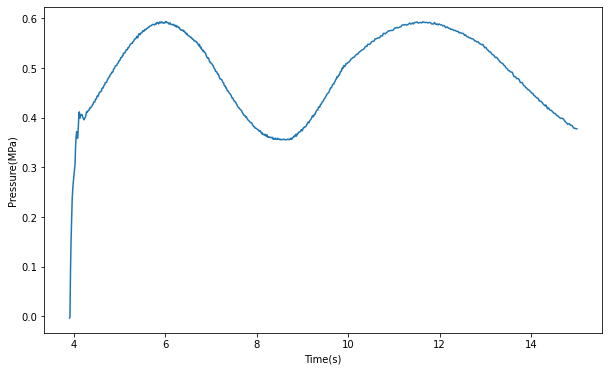

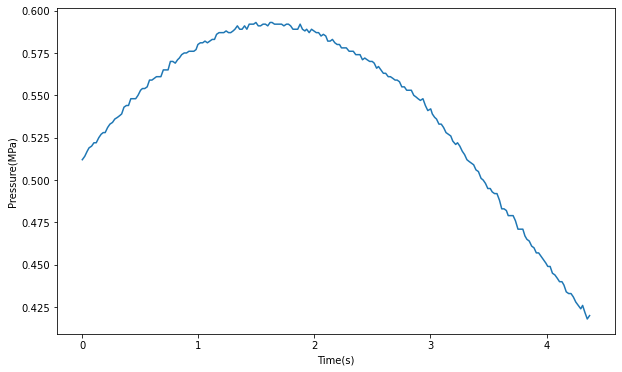

<Figure size 432x288 with 0 Axes>

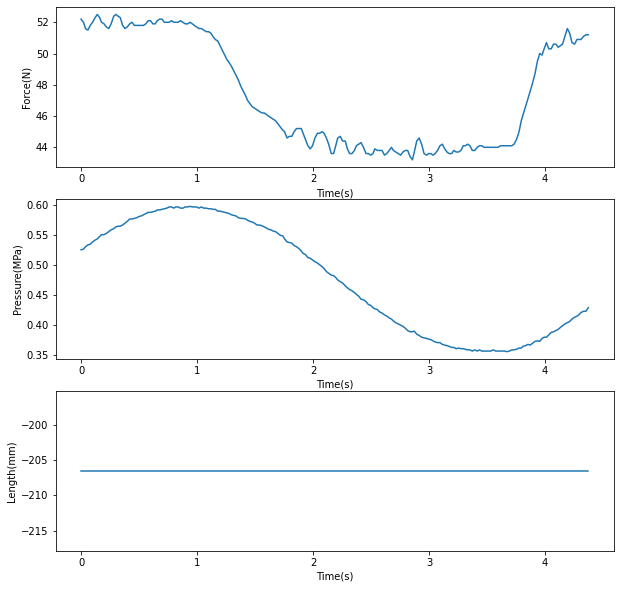

In [6]:
# com8 からの圧力データを取得する設定
com8 = serial.Serial("COM8", 115200)
# com15 からのセンサーデータを取得する設定
com15 = serial.Serial('COM15', 115200, timeout=1)

path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\pressure_control\\input\\'
path2 = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\pressure_control\\output\\'

file_name_all_com8 = f"{datetime.now().strftime('%Y%m%d')}_{file_count}_{measurement_kind}_{pressure}_all_p_input"
file_name_partial_com8 = f"{datetime.now().strftime('%Y%m%d')}_{file_count}_{measurement_kind}_{pressure}_partial_p_input"
date_com8 = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

file_name_all_com15 = f"{datetime.now().strftime('%Y%m%d')}_{file_count}_{measurement_kind}_{pressure}_all_p_output"
file_name_partial_com15 = f"{datetime.now().strftime('%Y%m%d')}_{file_count}_{measurement_kind}_{pressure}_partial_p_output"
date_com15 = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

print('start!')

t0_com8 = time.time()
t0_com15 = time.time()

# データを保存するリスト
all_time_vals_com8 = []
all_p_vals_com8 = []
partial_time_vals_com8 = []
partial_p_vals_com8 = []
partial_start_time_com8 = None

all_time_vals_com15 = []
all_length_vals_com15 = []  
all_p_vals_com15 = []
all_force_vals_com15 = []
partial_time_vals_com15 = []
partial_length_vals_com15 = []  
partial_p_vals_com15 = []
partial_force_vals_com15 = []
partial_start_time_com15 = None

with open(path + file_name_all_com8 + ".csv", "a", encoding='cp1252') as all_f_com8, \
        open(path + file_name_partial_com8 + ".csv", "a", encoding='cp1252') as partial_f_com8, \
        open(path2 + file_name_all_com15 + ".csv", "a", encoding='cp1252') as all_f_com15, \
        open(path2 + file_name_partial_com15 + ".csv", "a", encoding='cp1252') as partial_f_com15:
    
    # ヘッダーをファイルに書き込む
    if all_f_com8.tell() == 0:  # ファイルが空の場合だけヘッダーを書き込む
        print("time,p,voltage", file=all_f_com8)
    
    if partial_f_com8.tell() == 0:  # ファイルが空の場合だけヘッダーを書き込む
        print("time,p,voltage", file=partial_f_com8)
    
    if all_f_com15.tell() == 0:  # ファイルが空の場合だけヘッダーを書き込む
        print("time,length,pressure,force", file=all_f_com15)
    
    if partial_f_com15.tell() == 0:  # ファイルが空の場合だけヘッダーを書き込む
        print("time,length,pressure,force", file=partial_f_com15)
        
    try:
        while True:
            # com8 からのデータ処理
            t_com8 = time.time()
            t_inner_com8 = t_com8 - t0_com8
            if t_inner_com8 > 15:
                print("saved as " + file_name_all_com8 + ".csv" + "!")
                break

            data_com8 = com8.readline().decode().strip()
            current_time_com8 = time.time()
            elapsed_time_com8 = round((current_time_com8 - t0_com8), 3)  # 四捨五入して小数点以下第三位まで

            print(f"{elapsed_time_com8} - {data_com8}")

            if data_com8 and not data_com8.startswith("Sensor reading stopped"):
                parts_com8 = data_com8.split(',')
                if len(parts_com8) == 3:
                    wire_length, p_val_com8, force = parts_com8
                    p_val_com8 = float(p_val_com8) / 10.0  # bar から MPa への変換

                    if all_time_vals_com8 and elapsed_time_com8 <= all_time_vals_com8[-1]:
                        break

                    all_time_vals_com8.append(elapsed_time_com8)
                    all_p_vals_com8.append(p_val_com8)

                    print("{},{},{}".format(elapsed_time_com8, p_val_com8, force), file=all_f_com8)

                    if t_inner_com8 >= start_time and t_inner_com8 <= end_time:
                        if partial_start_time_com8 is None or elapsed_time_com8 <= partial_start_time_com8:
                            partial_start_time_com8 = elapsed_time_com8
                        partial_time_vals_com8.append(elapsed_time_com8 - partial_start_time_com8)
                        partial_p_vals_com8.append(p_val_com8)

                        print("{},{},{}".format(elapsed_time_com8, p_val_com8, force), file=partial_f_com8)
                else:
                    print("Invalid data format:", data_com8)
            elif data_com8.startswith("Sensor reading stopped"):
                print("Sensor reading stopped. Exiting loop.")
                break

            # com15 からのデータ処理
            t_com15 = time.time()
            t_inner_com15 = t_com15 - t0_com15
            if t_inner_com15 > 15:
                print("saved as " + file_name_all_com15 + ".csv" + "!")
                break

            data_com15 = com15.readline().decode().strip()
            current_time_com15 = time.time()
            elapsed_time_com15 = round((current_time_com15 - t0_com15), 3)  # 四捨五入して小数点以下第三位まで

            print(f"{elapsed_time_com15} - {data_com15}")

            if data_com15 and not data_com15.startswith("Sensor reading stopped"):
                parts_com15 = data_com15.split(',')
                if len(parts_com15) == 3:
                    wire_length, p_val_com15, force = parts_com15
                    p_val_com15 = float(p_val_com15) / 1000.0  

                    if all_time_vals_com15 and elapsed_time_com15 <= all_time_vals_com15[-1]:
                        break

                    all_time_vals_com15.append(elapsed_time_com15)
                    if wire_length:
                        all_length_vals_com15.append(float(wire_length))  # 追加した行
                    all_p_vals_com15.append(p_val_com15)
                    if force:
                        all_force_vals_com15.append(float(force))  # 追加した行

                    print("{},{},{},{}".format(elapsed_time_com15, wire_length, p_val_com15, force), file=all_f_com15)

                    if t_inner_com15 >= start_time and t_inner_com15 <= end_time:
                        if partial_start_time_com15 is None or elapsed_time_com15 <= partial_start_time_com15:
                            partial_start_time_com15 = elapsed_time_com15
                        partial_time_vals_com15.append(elapsed_time_com15 - partial_start_time_com15)
                        partial_length_vals_com15.append(float(wire_length))  # 追加した行
                        partial_p_vals_com15.append(p_val_com15)
                        partial_force_vals_com15.append(float(force))

                        print("{},{},{},{}".format(elapsed_time_com15, wire_length, p_val_com15, force), file=partial_f_com15)
                else:
                    print("Invalid data format:", data_com15)
            elif data_com15.startswith("Sensor reading stopped"):
                print("Sensor reading stopped. Exiting loop.")
                break


    except KeyboardInterrupt:
        print("Interrupt received. Saving CSV files and exiting.")

    finally:
        com8.close()
        com15.close()
        

# グラフの描画
# com8 からのデータのグラフの描画
plt.figure(figsize=(10,6))
plt.plot(all_time_vals_com8, all_p_vals_com8)
plt.xlabel('Time(s)')
plt.ylabel('Pressure(MPa)')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(partial_time_vals_com8, partial_p_vals_com8)
plt.xlabel('Time(s)')
plt.ylabel('Pressure(MPa)')
plt.show()

# グラフを保存
save_path_com8 = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\pressure_control\\input\\'
plt.savefig(save_path_com8 + file_name_all_com8 + '.jpg')
plt.savefig(save_path_com8 + file_name_partial_com8 + '.jpg')

# グラフの表示
plt.show()

#以下センサー値グラフ
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
plt.plot(partial_time_vals_com15, partial_force_vals_com15)
plt.xlabel('Time(s)')
plt.ylabel('Force(N)')

plt.subplot(3,1,2)
plt.plot(partial_time_vals_com15, partial_p_vals_com15)
plt.xlabel('Time(s)')
plt.ylabel('Pressure(MPa)')

plt.subplot(3,1,3)
plt.plot(partial_time_vals_com15, partial_length_vals_com15)
plt.xlabel('Time(s)')
plt.ylabel('Length(mm)')


# グラフを保存
save_path_com15 = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\graph\\pressure_control\\output\\'
plt.savefig(save_path_com15 + file_name_partial_com15 + '.jpg')

# グラフを表示
plt.show()
